# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

import pandas as pd #added pandas import

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

Total variance explained by first 1 component(s): 0.1640433127933339
Total variance explained by first 2 component(s): 0.2972781014878131
Total variance explained by first 3 component(s): 0.399012666709172
Total variance explained by first 4 component(s): 0.46964623099899355
Total variance explained by first 5 component(s): 0.5083126780938596
Total variance explained by first 10 component(s): 0.6522140373905493
Total variance explained by first 20 component(s): 0.8088582580399187
Total variance explained by first 30 component(s): 0.8984834072057704
Total variance explained by first 40 component(s): 0.9509268717145104
Total variance explained by first 50 component(s): 0.9821028317599373


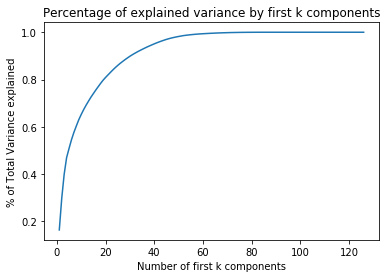

In [5]:
def P1():

## STUDENT START ###

    k = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] #list of k values
    total_var = [] #list of total variance explained

    k2 = [i for i in range(1,127)] #list of all possible k values
    for n in k2: #for all values in k2
        pca = PCA(n_components=n) #make a PCA model with k components
        pca.fit(train_data) #fit training data to pca
        total_var.append(sum(pca.explained_variance_ratio_)) #the sum of the fraction of variance explained
                                                            #by each component is added to a list
        if n in k: #if the number of components tested is also in list k, print the total variance explained by that number of components
            print("Total variance explained by first",n,"component(s):",sum(pca.explained_variance_ratio_))
                
    plt.plot(k2, total_var) #plot total variance explained for all k values
    plt.xlabel("Number of first k components")
    plt.ylabel("% of Total Variance explained")
    plt.title("Percentage of explained variance by first k components")
## STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

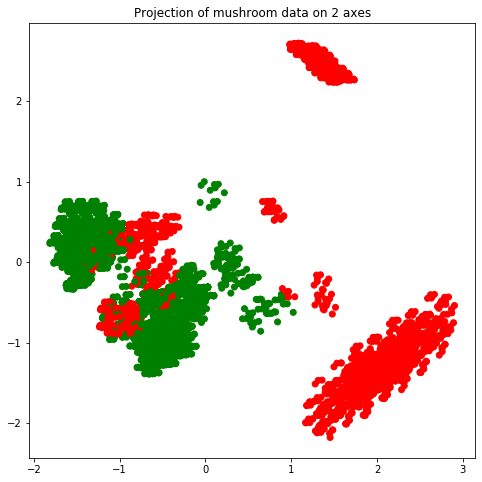

In [6]:
def P2():

## STUDENT START ###
    pca = PCA(n_components=2) #create a pca model with two components
    fitted_data = pca.fit_transform(train_data) #fit and transform training data
    
    xs = [i[0] for i in fitted_data] #get all x values from fitted data
    ys = [i[1] for i in fitted_data] #get all y values from fitted data
    colors = ['r' if i == 1 else 'g' for i in train_labels] #plot in red if data point represents a poisonous mushroom and green otherwise
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(xs, ys, c=colors) #plot 2d mushroom data
    ax.set_title('Projection of mushroom data on 2 axes')
## STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

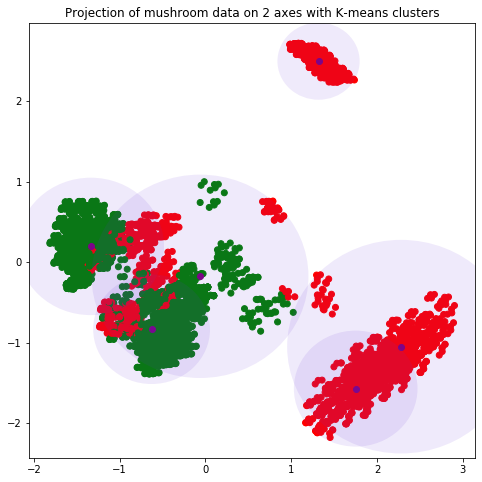

In [7]:
def P3():

## STUDENT START ###
    pca = PCA(n_components=2) #create a 2-component PCA model
    fitted_data = pca.fit_transform(train_data) #fit and transform training data

    xs = [i[0] for i in fitted_data] #get all x values from fitted data
    ys = [i[1] for i in fitted_data] #get all y values from fitted data
    colors = ['r' if i == 1 else 'g' for i in train_labels] #plot in red if data point represents a poisonous mushroom and green otherwise

    km = KMeans(n_clusters=6, init="k-means++") #create a K-Means model with 6 clusters
    six_clusters = km.fit(fitted_data) #fit the 2d data from PCA

    xs_c = [i[0] for i in six_clusters.cluster_centers_] #get the x-coordinates for all 6 clusters
    ys_c = [i[1] for i in six_clusters.cluster_centers_] #get the y-coordinates for all 6 clusters

    def get_max_distances(kmeans, points): #input KMeans model and list of 2d points and get the maximum distance between cluster centers and data points

        labels = kmeans.labels_ #get the labels of each data point that's been fitted
        centers = kmeans.cluster_centers_ #get the centers of each cluster
        out = []
        for c in range(len(centers)): #for each cluster
            distances = [] #create a list of distances
            for p in range(len(points)): #for every data point
                if labels[p] == c: #if it's been grouped in the given cluster
                    d = np.linalg.norm(centers[c]-points[p]) #calculate its distance from the cluster center
                    distances.append(d) #append this distance to the list of distances
            out.append(max(distances)) #get the maximum distance for the list, which will become the circle's radius
        return out #return a list of max distances for each cluster

    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(xs, ys, c=colors) #plot the 2d data from pca
    ax.scatter(xs_c, ys_c, c="purple") #plot cluster centers in purple
    for c, r in zip(six_clusters.cluster_centers_, get_max_distances(six_clusters, fitted_data)): #for each cluster center and radius in max_distances
        ax.add_patch(plt.Circle(c, r, fc='#6631D9', lw=3, alpha=0.1, zorder=1)) #plot the cluster's radius in purple

    ax.set_title('Projection of mushroom data on 2 axes with K-means clusters')
## STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

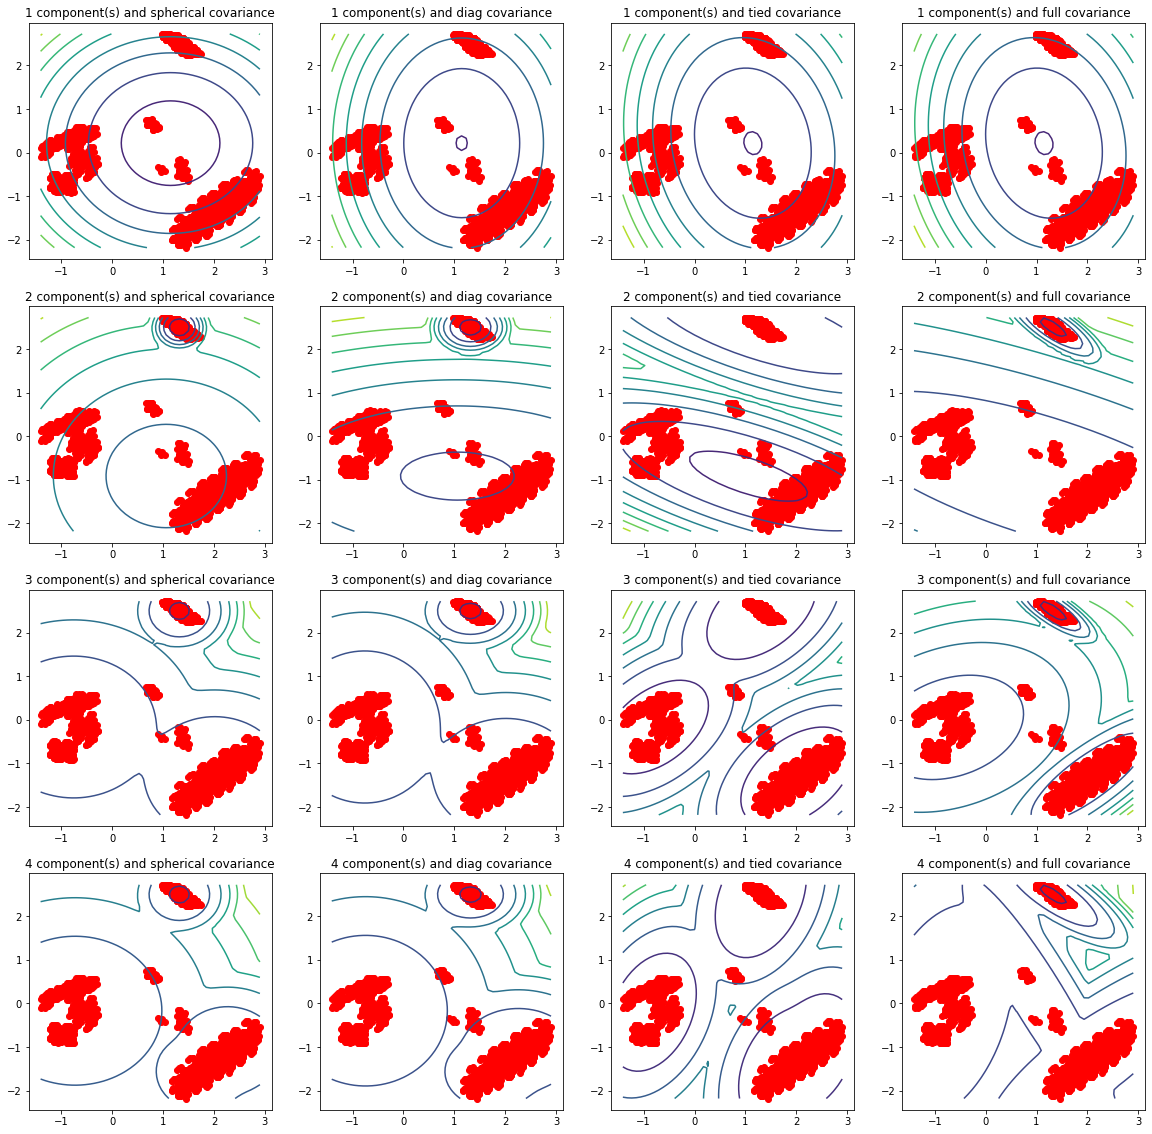

In [8]:
def P4():

## STUDENT START ###
    pca = PCA(n_components=2) #create a PCA model with 2 components
    fitted_data = pca.fit_transform(train_data) #fit and transform training data

    positive = [fitted_data[i] for i in range(len(fitted_data)) if train_labels[i] == 1] #get all positive examples from the fitted data given training labels

    xs = [i[0] for i in positive] #get all x values from 2d data
    ys = [i[1] for i in positive] #get all y values from 2d data

    cov_type = ['spherical', 'diag', 'tied', 'full'] #types of covariance

    x_vals = np.linspace(min(xs),max(xs)) #x-range found in data
    y_vals = np.linspace(min(ys),max(ys)) #y-range found in data
    X, Y = np.meshgrid(x_vals, y_vals) #create mesh grid
    XX = np.array([X.ravel(), Y.ravel()]).T #flatten and transform data from meshgrid
    fig, ax = plt.subplots(4, 4, figsize=(20,20)) 

    for i in range(1,5): #for 1 to 4 GMM components
        for t in cov_type: #for all different covariance matrix types
            gmm = GaussianMixture(n_components=i, covariance_type=t, random_state=12345) #create a GMM
            gmm_fit = gmm.fit(positive) #fit positive example data to GMM

            Z = -gmm_fit.score_samples(XX) #score meshgrid to create contour
            Z = Z.reshape(X.shape)
            ax[i-1][cov_type.index(t)].scatter(xs, ys, c='r') #plot positive 2d data
            ax[i-1][cov_type.index(t)].contour(X,Y,Z) #plot contour 
            title = str(i) + " component(s) and " + t + " covariance"
            ax[i-1][cov_type.index(t)].set_title(title)
## STUDENT END ###
P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def P5():

    ### STUDENT START ###
    pca = PCA(n_components=2) #create PCA model with 2 components
    fitted_data = pca.fit_transform(train_data) #fit and transform training data

    positive = [fitted_data[i] for i in range(len(fitted_data)) if train_labels[i] == 1] #select all positive examples from fitted data
    negative = [fitted_data[i] for i in range(len(fitted_data)) if train_labels[i] == 0] #select all negative examples from fitted data

    gmm_neg = GaussianMixture(n_components=4, covariance_type='full', random_state=12345) #create GMM model with 4 components for negative examples
    gmm_neg_fit = gmm_neg.fit(negative) #fit 2d negative example data to GMM

    gmm_pos = GaussianMixture(n_components=4, covariance_type='full', random_state=12345) #create GMM model with 4 components for positive examples
    gmm_pos_fit = gmm_pos.fit(positive) #fit 2d positive example data to GMM

    test_data_t = pca.transform(test_data) #PCA transform test data without fitting
    gmm_neg_score = gmm_neg.score_samples(test_data_t) #predict on test data given negative GMM model
    gmm_pos_score = gmm_pos.score_samples(test_data_t) #predict on test data given positive GMM model

    pred = [] #list of predictions
    for i in range(len(test_data_t)): #for all test data
        if gmm_neg_score[i] > gmm_pos_score[i]: #if the score for the negative model is higher
            pred.append(0) #append a 0 to the prediction list
        else: #otherwise append a 1 (signifying the example is positive)
            pred.append(1)

    accuracy = np.mean(pred == test_labels) #get accuracy by comparing to test labels

    print("Accuracy:", accuracy)
    ### STUDENT END ###

P5()

Accuracy: 0.9501779359430605


The accuracy of our predictions on the test data is approximately 95%

### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [10]:
def P6():

## STUDENT START ###
    cov_type = ['full', 'diagonal', 'spherical', 'tied'] #all types of covariance matrix
    pca_components = [1,2,3,4,5] #different numbers of PCA components
    gmm_components = [1,2,3,4,5] #different numbers of GMM components
    num_classes = 2 #we only have two classes in our data, positive or negative
    best_accuracy = [0,0,0,0] #array that stores the best model's characteristics
    acc_dict = {'full':[], 'diagonal':[], 'spherical':[], 'tied':[]} #dictionary used to create table below

    for c in cov_type: #for all types of covariance matrix
        for p in pca_components: #for all number of PCA components
            for g in gmm_components: #for all number of GMM components

                if c == "full": #given the type of covariance matrix
                    num_params = (p*g +p*(p+1)/2*g)*num_classes #calculate number of parameters
                elif c == "diagonal": 
                    num_params = (2*p*g)*num_classes
                elif c == "spherical": 
                    num_params = (p*g+g)*num_classes
                if c == "tied": 
                    num_params = (p*g+p*(p+1)/2)*num_classes

                if num_params<=50: #if the model has less than 50 parameters
                    pca = PCA(n_components=p) #create a PCA model with p number of components
                    fitted_data = pca.fit_transform(train_data) #fit and transform training data
                    gmm = GaussianMixture(n_components = g) #create a GMM model with g number of components
                    gmm_fit = gmm.fit(fitted_data) #fit 2d PCA training data

                    test_fitted = pca.transform(test_data) #transform test data
                    test_pred = gmm.predict(test_fitted) #predict on fitted test data
                    accuracy = np.mean(test_pred == test_labels) #get accuracy by comparing to test labels
                    acc_dict[c].append((int(num_params),accuracy)) #add tuple of number of parameters and accuracy to dictionary, under the corresponding covariance matrix type


                    if accuracy>best_accuracy[3]: #get best model's characteristics
                        best_accuracy[0] = c
                        best_accuracy[1] = p
                        best_accuracy[2] = g
                        best_accuracy[3] = accuracy


    def display_table(dic): #cleans and formats a dictionary as a pandas dataframe to display as a table

        max_size = max([len(dic[i]) for i in dic.keys()]) #get the size of the longest list in the dictionary
        for i in dic.keys(): #for every list in the dictionary 
            dic[i] = sorted(dic[i]) #sort the tuples by number of components
            dif = max_size - len(dic[i]) #add dashes to list in order to match maximum list length
            for k in range(dif):
                dic[i].append("---")

        df = pd.DataFrame(dic) #create and return a pandas dataframe out of the dictionary
        return df

    print(display_table(acc_dict)) #print table
    #print best GMM model characteristics and accuracy
    print("\n\nBest GMM model","\nCovariance type:",best_accuracy[0], "\nNumber of PCA components:",best_accuracy[1],"\nNumber of GMM components:", best_accuracy[2], "\nAccuracy:",best_accuracy[3])

## STUDENT END ###

P6()

                         full                    diagonal  \
0     (4, 0.3612099644128114)     (4, 0.3612099644128114)   
1     (8, 0.8843416370106761)    (8, 0.11565836298932385)   
2    (10, 0.3612099644128114)     (8, 0.3612099644128114)   
3    (12, 0.6690391459074733)    (12, 0.3612099644128114)   
4   (16, 0.44395017793594305)    (12, 0.6690391459074733)   
5    (18, 0.3612099644128114)    (16, 0.3612099644128114)   
6   (20, 0.33274021352313166)   (16, 0.44395017793594305)   
7    (20, 0.6761565836298933)    (16, 0.6761565836298933)   
8    (28, 0.3612099644128114)  (20, 0.021352313167259787)   
9    (30, 0.6761565836298933)    (20, 0.3612099644128114)   
10  (36, 0.10854092526690391)    (24, 0.5711743772241993)   
11  (40, 0.04804270462633452)     (24, 0.891459074733096)   
12   (40, 0.3612099644128114)    (32, 0.3238434163701068)   
13  (50, 0.25622775800711745)    (32, 0.5293594306049823)   
14                        ---   (36, 0.11387900355871886)   
15                      